- Reinforcement learning w/ Frozen lake
- Florent Dufour
- 2016 - 2022

In [9]:
import gym # OpenAI gym
import numpy as np
import time

# Exploration

In [4]:
env = gym.make('FrozenLake-v0')
print(env.observation_space.n) # Number of states
print(env.action_space.n) # Number of actions
env.reset()

16
4


0

In [6]:
action = env.action_space.sample() # random action
observation, reward, done, info = env.step(action)

In [8]:
env.render() # Draw the env
# F: Frozen
# G: Goal
# S: Start

  (Right)
SFFF
FHFH
FFFH
HFFG


In [20]:
# Try things out

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 2500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9

rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[1.43272666e-01 2.53840225e-02 2.46616573e-02 1.62544396e-02]
 [8.98790111e-03 3.63993922e-03 1.03489908e-02 2.57961209e-01]
 [3.00632722e-03 3.30645877e-03 8.32423134e-03 2.02737923e-01]
 [1.98991821e-03 5.42197338e-03 1.10399985e-03 1.21464922e-01]
 [2.40288779e-01 7.14781631e-04 1.24400630e-02 8.95018711e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.89383506e-03 0.00000000e+00 5.58475501e-05 5.39189809e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.89024683e-03 3.49865595e-03 9.68339553e-03 2.26910849e-01]
 [2.21303531e-03 4.32056594e-01 6.71090558e-03 1.21290858e-02]
 [1.45773976e-03 9.51001296e-02 1.14578205e-03 2.62979395e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.48901145e-02 9.01287664e-02 3.98764120e-01 9.26895770e-02]
 [1.57150056e-01 8.97486206e-01 1.35415883e-01 1.69586425e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

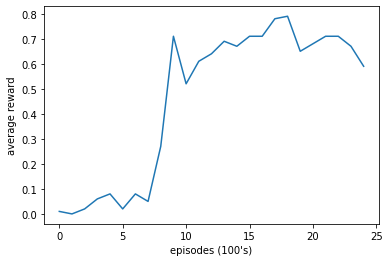

In [21]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()